### Hackathon Taxi-Fare Prediction

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = pd.concat([train,test],ignore_index=False)
combined.shape , train.shape, test.shape

((50000, 20), (35000, 20), (15000, 19))

In [2]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [3]:
combined.dtypes

trip_distance              float64
rate_code                    int64
store_and_fwd_flag          object
payment_type                 int64
fare_amount                float64
extra                      float64
mta_tax                    float64
tip_amount                 float64
tolls_amount               float64
imp_surcharge              float64
total_amount               float64
pickup_location_id           int64
dropoff_location_id          int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
hour_of_day                  int64
trip_duration              float64
calculated_total_amount    float64
dtype: object

In [4]:
combined.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [5]:
# Univariate Analysis:
import numpy as np
num_cols = combined.select_dtypes(include=np.number).columns
num_cols

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [6]:
num_cols = ['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration']
cat_cols = ['month', 'day', 'day_of_week', 'hour_of_day','store_and_fwd_flag']


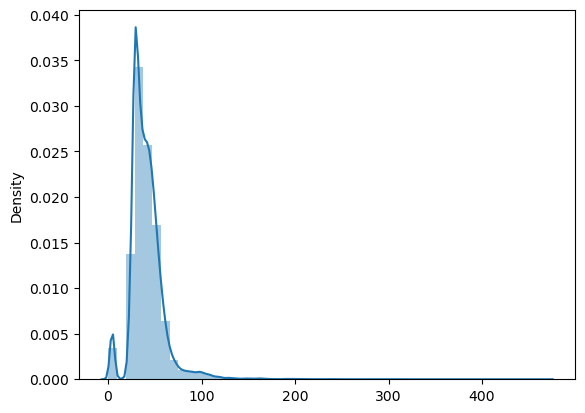

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=combined['calculated_total_amount']);

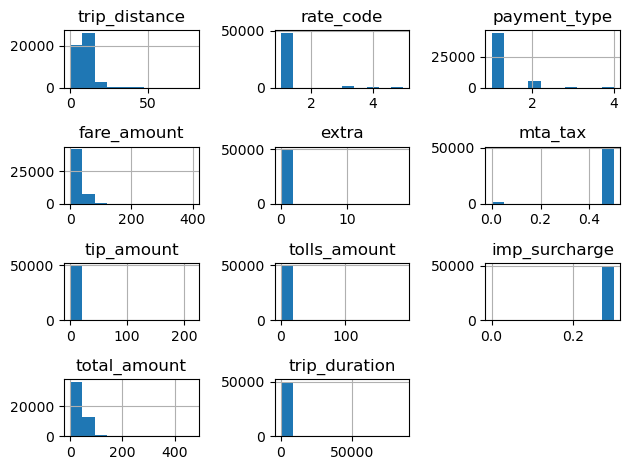

In [10]:
import matplotlib.pyplot as plt
combined.loc[:,num_cols].hist()
plt.tight_layout()
plt.show()

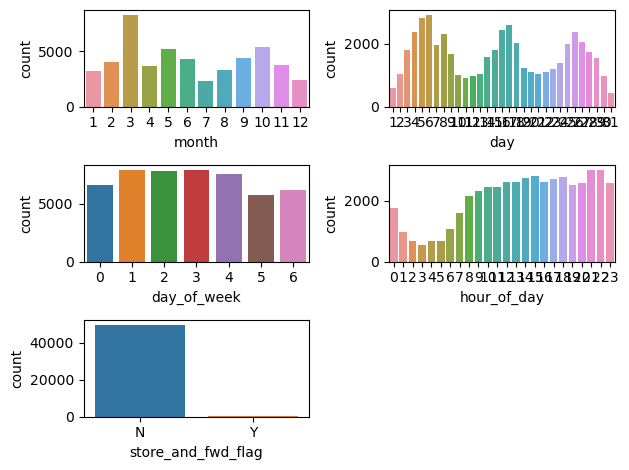

In [13]:
t = 1
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(x=combined.loc[:,i])
    t+=1
    
plt.tight_layout()
plt.show()

In [14]:
combined.isna().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [15]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [16]:
combined['extra'].unique()

array([ 0.  ,  0.5 ,  1.  , 17.5 ,  1.5 , 18.5 ,  0.8 ,  0.11, 18.  ])

In [17]:
combined['amount_per_mile'] = combined['total_amount'] / combined['trip_distance']

In [18]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,amount_per_mile
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,262,138,2018,3,7,2,6,2131.0,24.3,4.517203
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,263,236,2018,2,25,6,10,2377.0,37.4,22.750000


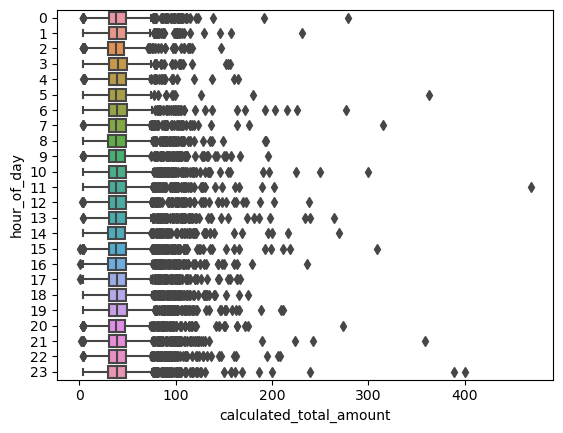

In [19]:
sns.boxplot(y='hour_of_day',x='calculated_total_amount',data=combined,orient='h');

In [20]:
# 5,6,7,11,13,14,15,16,20,21,23

combined['peak_hour'] = combined.hour_of_day.apply(lambda x:1 if x in [5,6,7,11,13,14,15,16,20,21,23] else 0)

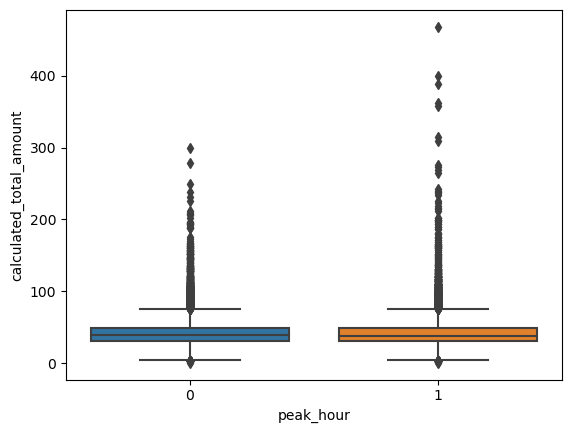

In [21]:
sns.boxplot(x='peak_hour',y = 'calculated_total_amount',data=combined);

In [22]:
pd.set_option('display.max_columns',50)
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,amount_per_mile,peak_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3,4.517203,1
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4,22.750000,0


In [23]:
combined['day_wise_mean_amt'] = combined.groupby(by='day')['total_amount'].transform('mean')
combined['day_wise_median_amt'] = combined.groupby(by='day')['total_amount'].transform('median')
combined['day_wise_max_amt'] = combined.groupby(by='day')['total_amount'].transform('max')
combined['day_wise_min_amt'] = combined.groupby(by='day')['total_amount'].transform('min')


In [24]:
combined['month_wise_mean_amt'] = combined.groupby(by='month')['total_amount'].transform('mean')
combined['month_wise_median_amt'] = combined.groupby(by='month')['total_amount'].transform('median')
combined['month_wise_max_amt'] = combined.groupby(by='month')['total_amount'].transform('max')
combined['month_wise_min_amt'] = combined.groupby(by='month')['total_amount'].transform('min')


In [25]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,amount_per_mile,peak_hour,day_wise_mean_amt,day_wise_median_amt,day_wise_max_amt,day_wise_min_amt,month_wise_mean_amt,month_wise_median_amt,month_wise_max_amt,month_wise_min_amt
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3,4.517203,1,41.038485,37.30,389.12,3.30,42.229679,39.56,400.80,3.3
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4,22.750000,0,43.977707,41.58,227.30,3.96,40.589817,38.16,299.96,3.3


In [26]:
combined['trip_count'] = combined.groupby(by=['pickup_location_id'])['dropoff_location_id'].transform('nunique')

In [27]:
combined['dropoff_location_id'].nunique()

255

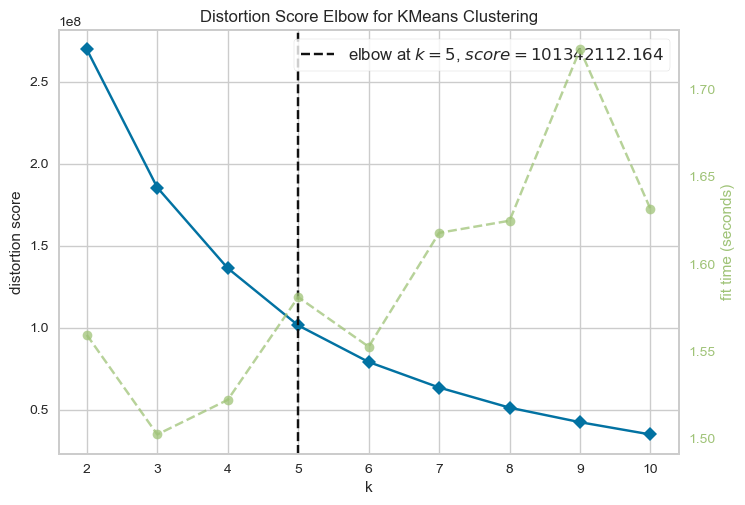

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()
kelbow = KElbowVisualizer(estimator=kmeans)

kelbow.fit(combined.loc[:,['pickup_location_id','dropoff_location_id']])
kelbow.show() 

In [29]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(combined.loc[:,['pickup_location_id','dropoff_location_id']])

kmeans.cluster_centers_

combined['geo_location'] = kmeans.labels_

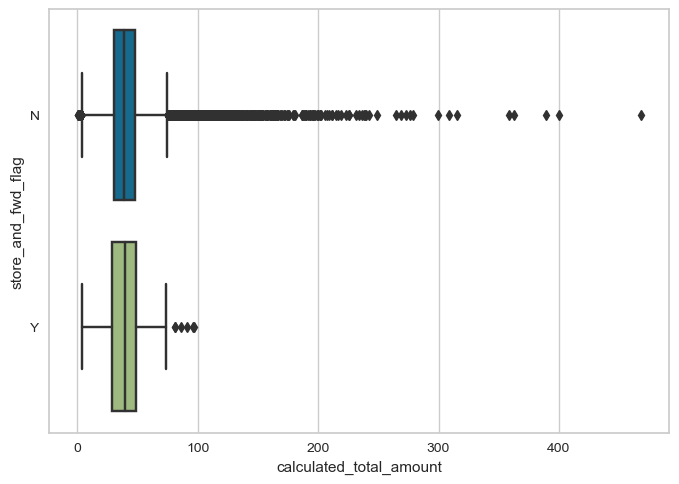

In [30]:
sns.boxplot(x = combined['calculated_total_amount'],y = combined['store_and_fwd_flag'],orient = 'h');

In [31]:
combined.groupby(by = 'rate_code')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
rate_code,,,,,,,,
1,48133.0,39.284172,13.781198,3.30,30.29,37.86,47.25,468.35
2,4.0,68.970000,3.317690,66.00,66.42,68.41,70.96,73.06
3,926.0,98.802840,18.871663,22.80,88.87,97.90,107.16,209.07
4,249.0,97.141928,53.033051,2.80,60.30,90.08,122.86,462.35
5,688.0,93.100610,59.629687,0.31,57.25,76.15,116.76,400.80


In [32]:
combined['Trip_count_ratecode'] = combined.groupby(by = 'rate_code')['total_amount'].transform('nunique')
combined['Avg_amt_ratecode'] = combined.groupby(by = 'rate_code')['total_amount'].transform('mean')
combined['median_amt_ratecode'] = combined.groupby(by = 'rate_code')['total_amount'].transform('median')
combined['max_amt_ratecode'] = combined.groupby(by = 'rate_code')['total_amount'].transform('max')
combined['min_amt_ratecode'] = combined.groupby(by = 'rate_code')['total_amount'].transform('min')


In [33]:
combined.groupby(by = 'payment_type')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
1,44109.0,42.729747,19.110126,3.30,31.00,39.67,49.27,468.35
2,5654.0,31.765354,16.861645,0.31,24.30,29.30,38.80,238.44
3,179.0,25.883799,21.345574,0.31,4.30,26.80,36.05,170.29
4,58.0,32.293276,28.497052,3.30,23.05,30.55,43.74,200.30


In [34]:
combined['Trip_count_pmt_type'] = combined.groupby(by = 'payment_type')['total_amount'].transform('nunique')
combined['Avg_amt_pmt_type'] = combined.groupby(by = 'payment_type')['total_amount'].transform('mean')
combined['median_amt_pmt_type'] = combined.groupby(by = 'payment_type')['total_amount'].transform('median')
combined['max_amt_pmt_type'] = combined.groupby(by = 'payment_type')['total_amount'].transform('max')
combined['min_amt_pmt_type'] = combined.groupby(by = 'payment_type')['total_amount'].transform('min')


In [35]:
hours = combined['trip_duration'] / 3600

combined['miles_per_hour'] = combined['trip_distance'] / hours

In [36]:
combined.shape

(50000, 43)

In [37]:
newtrain = combined.iloc[0:train.shape[0],:]
newtest = combined.iloc[train.shape[0]:,:]

In [38]:
del newtest['calculated_total_amount']

In [39]:
newtrain.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,amount_per_mile,peak_hour,day_wise_mean_amt,day_wise_median_amt,day_wise_max_amt,day_wise_min_amt,month_wise_mean_amt,month_wise_median_amt,month_wise_max_amt,month_wise_min_amt,trip_count,geo_location,Trip_count_ratecode,Avg_amt_ratecode,median_amt_ratecode,max_amt_ratecode,min_amt_ratecode,Trip_count_pmt_type,Avg_amt_pmt_type,median_amt_pmt_type,max_amt_pmt_type,min_amt_pmt_type,miles_per_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,4.517203,1,41.038485,37.30,389.12,3.30,42.229679,39.56,400.80,3.30,74,3,2420,39.284172,37.86,468.35,3.3,3131,42.729747,39.67,468.35,3.3,15.221023
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,22.750000,0,43.977707,41.58,227.30,3.96,40.589817,38.16,299.96,3.30,119,1,2420,39.284172,37.86,468.35,3.3,3131,42.729747,39.67,468.35,3.3,0.302903
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,5.976166,0,41.691287,39.07,174.30,3.30,40.487607,37.94,276.38,0.31,218,2,2420,39.284172,37.86,468.35,3.3,3131,42.729747,39.67,468.35,3.3,27.013997
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,4.874737,1,43.977707,41.58,227.30,3.96,42.174584,39.03,220.00,3.30,169,0,2420,39.284172,37.86,468.35,3.3,3131,42.729747,39.67,468.35,3.3,13.225058
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,4.717241,1,39.290653,36.00,266.56,3.30,41.322749,38.81,266.56,0.31,152,4,2420,39.284172,37.86,468.35,3.3,3131,42.729747,39.67,468.35,3.3,13.257143


In [40]:
num = ['trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount','trip_duration','amount_per_mile',
       'day_wise_mean_amt', 'day_wise_median_amt', 'day_wise_max_amt',
       'day_wise_min_amt', 'month_wise_mean_amt', 'month_wise_median_amt',
       'month_wise_max_amt', 'month_wise_min_amt', 'trip_count',
       'Trip_count_ratecode', 'Avg_amt_ratecode',
       'median_amt_ratecode', 'max_amt_ratecode', 'min_amt_ratecode',
       'Trip_count_pmt_type', 'Avg_amt_pmt_type', 'median_amt_pmt_type',
       'max_amt_pmt_type', 'min_amt_pmt_type', 'miles_per_hour']
len(num)

30

In [41]:
from scipy import stats
inp_feats = []

for i in num:
    p_value = stats.ttest_ind(newtrain.loc[:,i],newtrain.calculated_total_amount)[1]
    print(f'P-value for {i} and Calculated_total_amount: {p_value}')
    
    if p_value < 0.05:
        inp_feats.append(i)
    else:
        pass

P-value for trip_distance and Calculated_total_amount: 0.0
P-value for fare_amount and Calculated_total_amount: 0.0
P-value for extra and Calculated_total_amount: 0.0
P-value for mta_tax and Calculated_total_amount: 0.0
P-value for tip_amount and Calculated_total_amount: 0.0
P-value for tolls_amount and Calculated_total_amount: 0.0
P-value for imp_surcharge and Calculated_total_amount: 0.0
P-value for total_amount and Calculated_total_amount: 0.4154452634710889
P-value for trip_duration and Calculated_total_amount: 0.0
P-value for amount_per_mile and Calculated_total_amount: 0.0
P-value for day_wise_mean_amt and Calculated_total_amount: 0.39728077419672436
P-value for day_wise_median_amt and Calculated_total_amount: 4.767751038293785e-181
P-value for day_wise_max_amt and Calculated_total_amount: 0.0
P-value for day_wise_min_amt and Calculated_total_amount: 0.0
P-value for month_wise_mean_amt and Calculated_total_amount: 0.37010525833652086
P-value for month_wise_median_amt and Calculat

In [42]:
len(inp_feats)

25

In [43]:
x = newtrain.loc[:,inp_feats]

In [44]:
cat = ['rate_code', 'store_and_fwd_flag', 'payment_type','peak_hour','geo_location']

import statsmodels.formula.api as sfa 
from statsmodels.stats.anova import anova_lm

model = sfa.ols('calculated_total_amount~rate_code+store_and_fwd_flag+payment_type+peak_hour+\
geo_location',data=newtrain).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
store_and_fwd_flag,1.0,3.789820e+02,378.982032,1.033355,3.093789e-01
rate_code,1.0,1.768833e+03,1768.832509,4.823006,2.808886e-02
payment_type,1.0,2.104208e+04,21042.075231,57.374600,3.690918e-14
peak_hour,1.0,5.541712e+02,554.171200,1.511037,2.189892e-01
geo_location,1.0,1.897541e+01,18.975406,0.051739,8.200649e-01
Residual,34994.0,1.283401e+07,366.748964,NaN,NaN


In [45]:
x['rate_code'] = newtrain['rate_code']
x['payment_type'] = newtrain['payment_type']

In [46]:
x.shape

(35000, 27)

In [47]:
finaltest = newtest.loc[:,x.columns]

In [48]:
num_cols = x.iloc[:,:-2].columns

In [49]:
# Robust scaler to remove the outlier effect

from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
# Train = x
scaled_x = pd.DataFrame(robust.fit_transform(x.loc[:,num_cols]),columns=num_cols)

# test = finaltest
scaled_test = pd.DataFrame(robust.transform(finaltest.loc[:,num_cols]),columns=num_cols)

In [50]:
scaled_x['rate_code'] = x['rate_code']
scaled_x['payment_type'] = x['payment_type']

scaled_test['rate_code'] = x['rate_code']
scaled_test['payment_type'] = x['payment_type']

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor


In [52]:
# base model
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    models['ADA'] = AdaBoostRegressor()
    return models

In [53]:
from sklearn.model_selection import KFold,cross_val_score
my_y = newtrain.calculated_total_amount 
def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = -cross_val_score(estimator=model,X =scaled_x,y = my_y,cv=cv,scoring='neg_mean_squared_error',
                            n_jobs=-1)
    return scores




In [54]:
# lets use the functions to calculate the scores........

models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 367.23557002599375
DTREE 600.3857173601397
RF 528.4810305302063
GBM 488.41627564862654
XGB 470.4496108318508
ADA 598.9931133041978


In [55]:
# sns.boxplot(result,labels=names)

In [56]:
from sklearn.ensemble import StackingRegressor

GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
LR = LinearRegression()
base_estimators = [('GBM',GBM),('XGB',XGB)]
stack = StackingRegressor(estimators = base_estimators,final_estimator=LR,cv=5)

pred = stack.fit(scaled_x,my_y).predict(scaled_test)

In [57]:
submission = pd.read_csv('submission.csv')
submission['calculated_total_amount'] = pred

submission.to_csv('stack1.csv',index=False)

In [58]:
lr = LinearRegression()
pred = lr.fit(scaled_x,my_y).predict(scaled_test)

In [59]:
submission = pd.read_csv('submission.csv')
submission['calculated_total_amount'] = pred

submission.to_csv('lrpred.csv',index=False)

#### Public Score: 19.49483
#### Private Score: 19.17861
#### Rank : 128
#### Website: MACHINE HACK

## END........